In [1]:
from pdf2image import convert_from_path, convert_from_bytes
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def convert_to_png(path_list):
    images = []
    for i in path_list:
        images.append(convert_from_path(i)[0])
    for i in images:
        title_name = str(i) + '_temp' + '.png' 
        i.save(title_name)
    os.rename(title_name, 'sample_temp.png')

In [3]:
path = ['0H54AH30_10.pdf']
convert_to_png(path)


In [4]:
image_1 = cv2.imread('sample_temp.png')

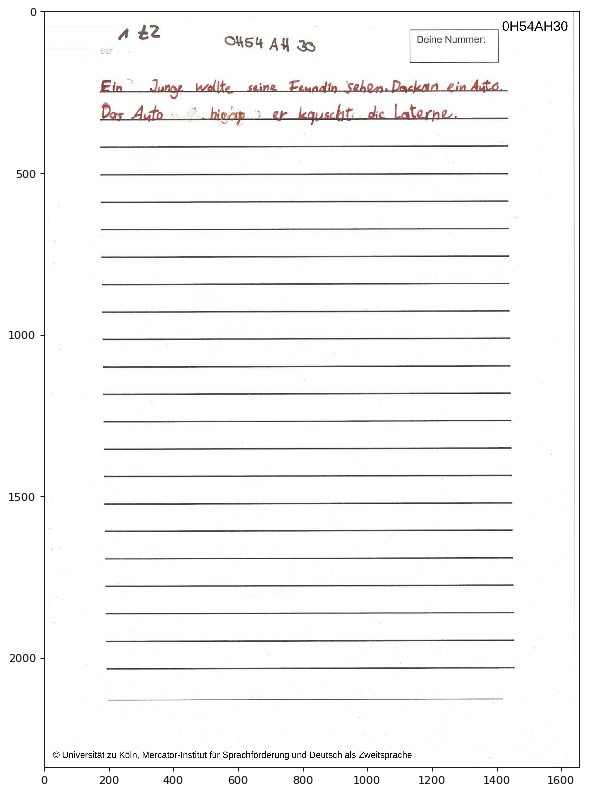

In [61]:
display_image(image_1)

In [5]:

def display_image(img, cmap=None):
    dpi = 80
    margin = 0.05 # (5% of the width/height of the figure...)
    xpixels, ypixels = 800, 800

    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    ax.imshow(img, cmap=cmap)
    plt.show()

In [6]:
img = cv2.imread('sample_temp.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = np.zeros(gray.shape, dtype = "uint8")

th2 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, -2)


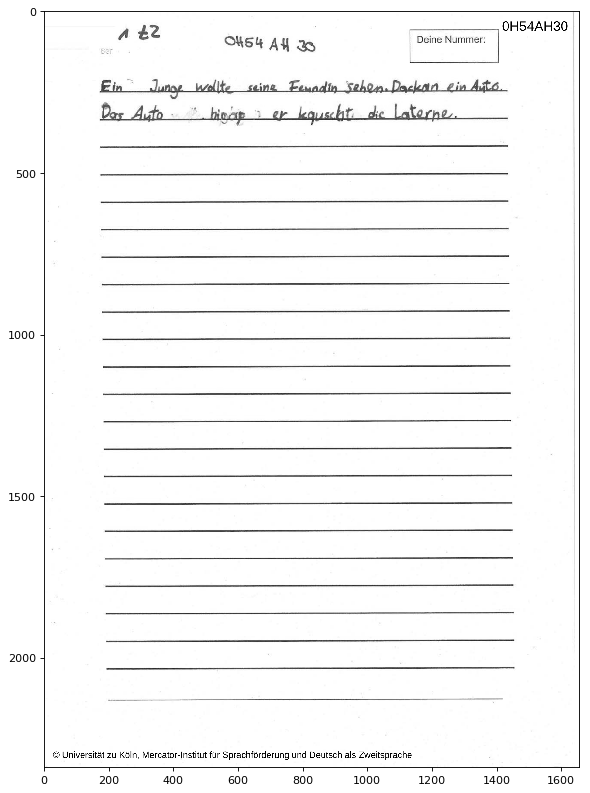

In [7]:
display_image(gray, 'gray')

In [158]:


img = cv2.imread("sample_temp.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.bitwise_not(img)
th2 = cv2.adaptiveThreshold(img,200, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,0)
cv2.imwrite('result1.jpg', th2)

horizontal = th2
rows,cols = horizontal.shape

#inverse the image, so that lines are black for masking
horizontal_inv = cv2.bitwise_not(horizontal)
cv2.imwrite('result1.5.jpg', horizontal_inv)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
cv2.imwrite('result2.jpg', masked_img)
# reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)
cv2.imwrite("result3.jpg", th2)


horizontalsize = int(cols / 30)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
cv2.imwrite("horizontal.jpg", horizontal)


#step1
edges = cv2.adaptiveThreshold(horizontal,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
cv2.imwrite("edges.jpg", edges)


#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
cv2.imwrite("dilated.jpg", dilated)

# step3
smooth = horizontal.copy()

#step 4
smooth = cv2.blur(smooth, (4,4))
cv2.imwrite("smooth.jpg", smooth)


#step 5
(rows, cols) = np.where(img == 0)
horizontal[rows, cols] = smooth[rows, cols]

cv2.imwrite("horizontal_final.jpg", horizontal)





True

In [151]:
type(th2)

numpy.ndarray

In [152]:

img = cv2.imread("sample_temp.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [153]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [223, 235, 247, ..., 255, 255, 255],
       [216, 232, 246, ..., 255, 255, 255],
       [216, 232, 246, ..., 255, 255, 255]], dtype=uint8)

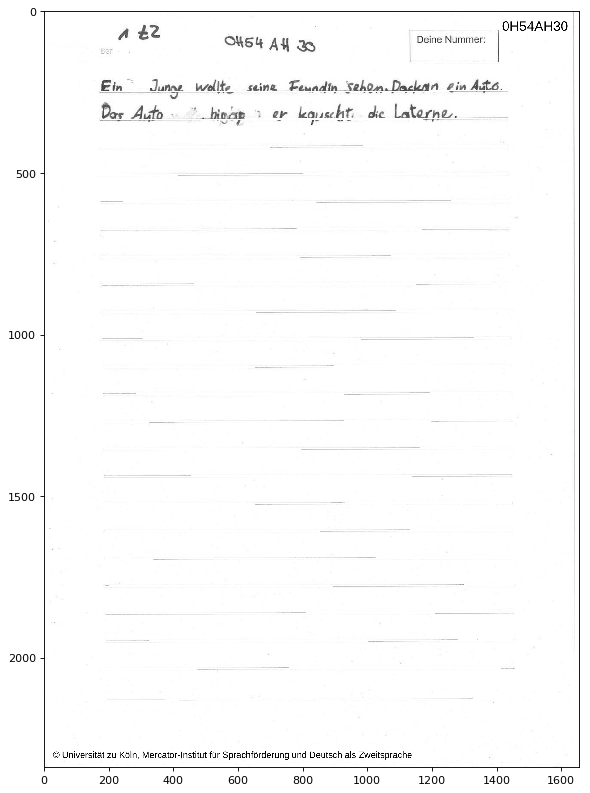

In [159]:
import matplotlib.pyplot as plt
display_image(gray, 'gray')

In [196]:
from PIL import Image
im = Image.fromarray(gray)
im.save("your_file.jpeg")

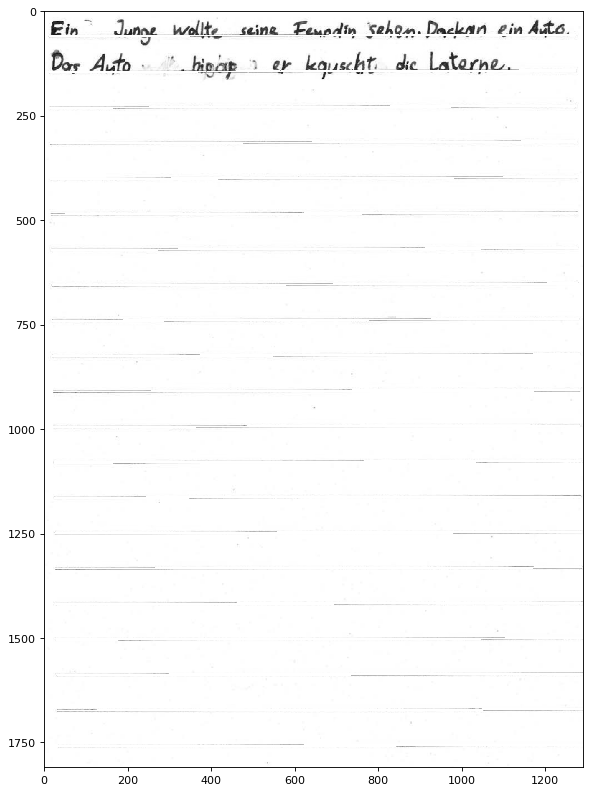

In [244]:
#crop the top
gray_one = gray[190:2000,160:1450]
display_image(gray_one, 'gray')


In [226]:
from scipy import stats
i = []
means = []
stds = []
sums = []
for idx, array in enumerate(gray_one):
    i.append(idx)
    means.append(np.mean(array))
    stds.append(np.std(array))
    sums.append(sum(array))


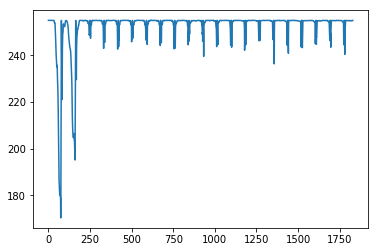

In [227]:
plt.plot(i, means)

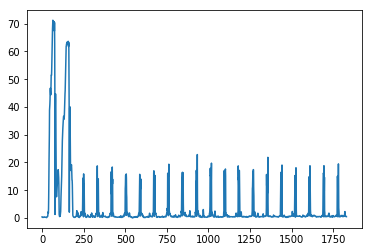

In [228]:
plt.plot(i, stds)

In [229]:
diff_means = []
for idx, mean in enumerate(means):
    try:
        diff_means.append(means[idx+1] - means[idx])
    except:
        break

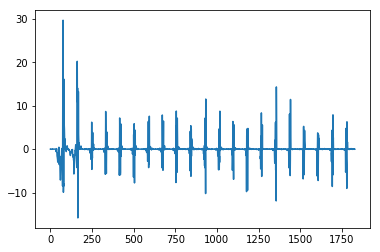

In [230]:
plt.plot(diff_means)

In [231]:
white_spaces = diff_means[300:2000]
print('min: ', min(white_spaces))
print('max: ', max(white_spaces))

min:  -11.927906976744197
max:  14.31472868217054


In [232]:
diff_stds = []
for idx, std in enumerate(stds):
    try:
        diff_stds.append(stds[idx+1] - stds[idx])
    except:
        break

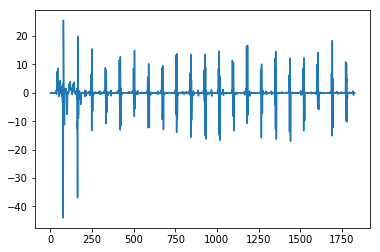

In [233]:
plt.plot(diff_stds)

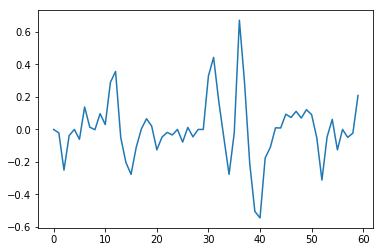

In [242]:
plt.plot(diff_stds[260:320])

In [254]:
stds = np.array(stds)

In [256]:
sub_arrays = np.array_split(stds, 22)

In [258]:
partition_stds = []
for i in sub_arrays:
    partition_stds.append(np.std(i))

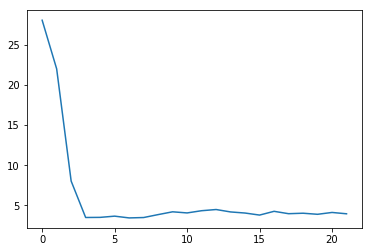

In [259]:
plt.plot(partition_stds)

In [262]:
difference_partition_stds = []
for idx, std in enumerate(partition_stds):
    try:
        difference_partition_stds.append(partition_stds[idx+1]-partition_stds[idx])
    except:
        break

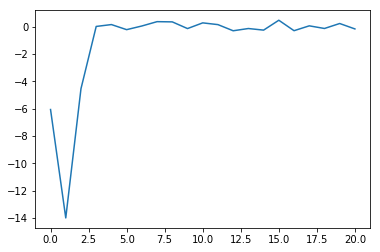

In [263]:
plt.plot(difference_partition_stds)

In [366]:
convert_to_png(['0K56SU16_631.pdf'])

In [367]:
image_2_orig = cv2.imread('sample_temp.png')

In [368]:
image_2 = cv2.cvtColor(image_2_orig, cv2.COLOR_BGR2GRAY)

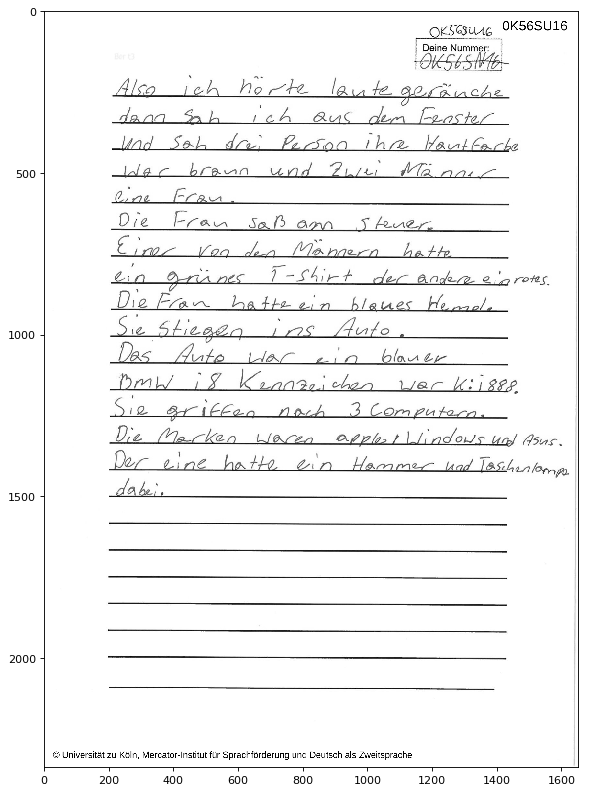

In [369]:
image_2_orig = cv2.imread('sample_temp.png')
image_2 = cv2.cvtColor(image_2_orig, cv2.COLOR_BGR2GRAY)
# image_2=image_2[180:2200, :]
display_image(image_2, 'gray')

In [288]:
from scipy import stats
i = []
means = []
stds = []
sums = []
for idx, array in enumerate(image_2):
    i.append(idx)
    means.append(np.mean(array))
    stds.append(np.std(array))
    sums.append(sum(array))

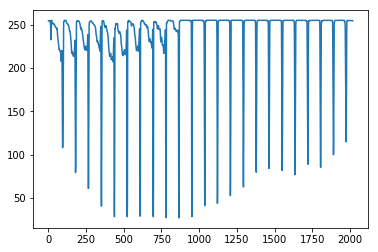

In [289]:
plt.plot(means)

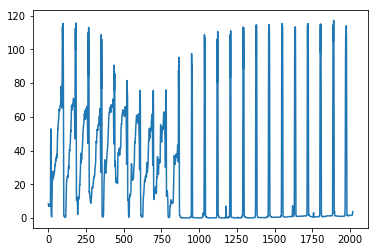

In [291]:
plt.plot(stds)

In [294]:
diff_stds = []
for idx, std in enumerate(stds):
    try:
        diff_stds.append(stds[idx+1] - stds[idx])
    except:
        break
    
    

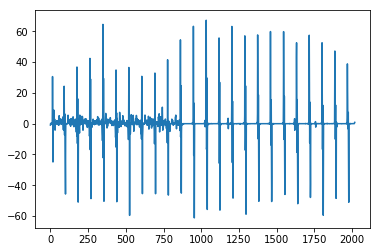

In [295]:
plt.plot(diff_stds)

In [370]:

img = cv2.bitwise_not(image_2)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
cv2.imwrite('result1.jpg', th2)

horizontal = th2
rows,cols = horizontal.shape

#inverse the image, so that lines are black for masking
# horizontal_inv = cv2.bitwise_not(horizontal)
# cv2.imwrite('result1.5.jpg', horizontal_inv)
# #perform bitwise_and to mask the lines with provided mask
# masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
# cv2.imwrite('result2.jpg', masked_img)
# # reverse the image back to normal
# masked_img_inv = cv2.bitwise_not(masked_img)
# # cv2.imwrite("result3.jpg", th2)
# cv2.imwrite('result4.jpg', masked_img_inv)


horizontalsize = int(cols / 45)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,3))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
cv2.imwrite("horizontal.jpg", horizontal)


#step1
edges = cv2.adaptiveThreshold(horizontal,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
cv2.imwrite("edges.jpg", edges)


#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
cv2.imwrite("dilated.jpg", dilated)

# step3
smooth = horizontal.copy()

#step 4
smooth = cv2.blur(smooth, (20,20))
cv2.imwrite("smooth.jpg", smooth)


#step 5
(rows, cols) = np.where(img == 0)
horizontal[rows, cols] = smooth[rows, cols]

cv2.imwrite("horizontal_final.jpg", horizontal)

True

In [322]:
smooth.shape

(2337, 1639)

In [323]:
horizontal.shape

(2337, 1639)

In [324]:
gray.shape

(2337, 1639)

In [353]:
img = cv2.imread('horizontal_final.jpg')

In [327]:
type(image_2)

numpy.ndarray

In [328]:
type(img)

numpy.ndarray

In [371]:

image = cv2.imread('sample_temp.png')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

threshold= set(range(80,256))
for i, array in enumerate(horizontal):
    for j, element in enumerate(array):
        if element in threshold:
            gray[i, j] = 255

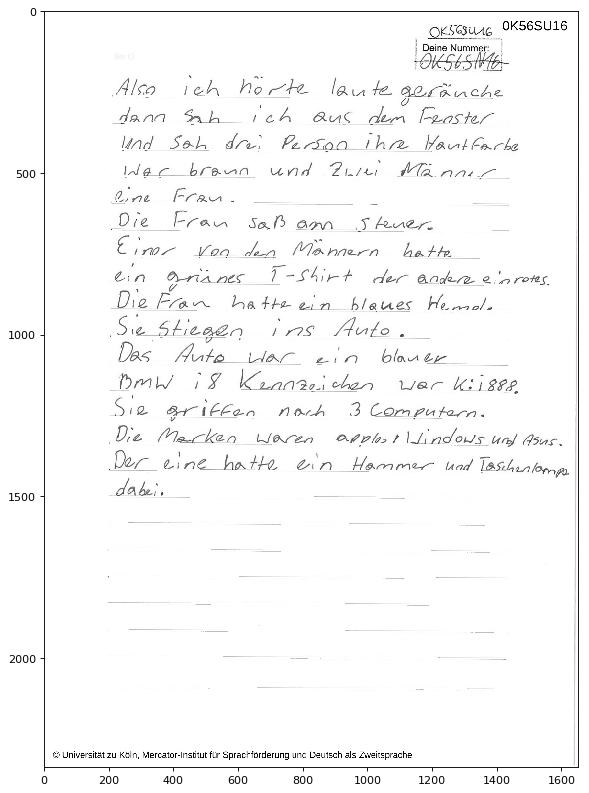

In [372]:
display_image(gray,'gray')

In [362]:
np.unique(horizontal)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
       255], dtype=uint8)